In [1]:
import nltk
nltk.download("book", quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [4]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])


Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [5]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [6]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [7]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [8]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [9]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [10]:
def tokenizer():
    return ["/".join(p) for p in tagged_list]

tokenizer()


['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

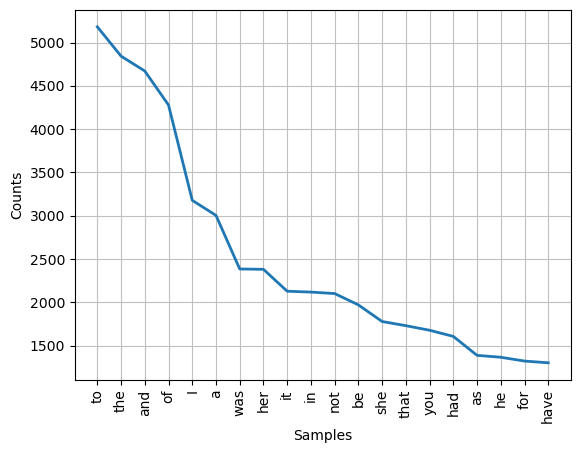

In [11]:
from nltk import Text
import matplotlib.pyplot as plt
text = Text(retokenize.tokenize(emma_raw))
text.plot(20)
plt.show()

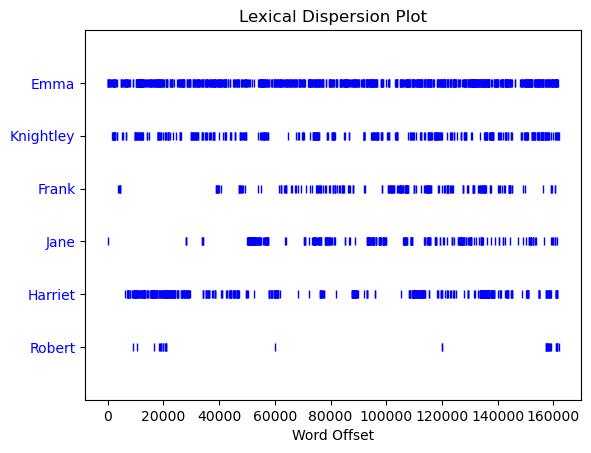

In [12]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [13]:
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [14]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [15]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [16]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [17]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

In [18]:
from nltk import PorterStemmer, LancasterStemmer, word_tokenize

#PorterStemmer 방법
porter = PorterStemmer()

print(porter.stem('plays'),porter.stem('played'),porter.stem('playing'))
print(porter.stem('laughs'),porter.stem('laughed'),porter.stem('laughing'))
print(porter.stem('happier'),porter.stem('happiest'))
print(porter.stem('the going'))

play play play
laugh laugh laugh
happier happiest
the go


In [19]:
lancaster = LancasterStemmer() 
print(lancaster.stem('plays'),lancaster.stem('played'),lancaster.stem('playing'))
print(lancaster.stem('laughs'),lancaster.stem('laughed'),lancaster.stem('laughing'))
print(lancaster.stem('happier'),lancaster.stem('happiest'))
print(lancaster.stem('the going'))

play play play
laugh laugh laugh
happy happiest
the going


In [20]:
from nltk import PorterStemmer, WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
print(lemmatizer.lemmatize('flying', pos='v')) 
print(lemmatizer.lemmatize('flies', pos='n'))

fly
fly


In [21]:
# 어간 추출 (Lancaster)
print(lancaster.stem("flying"))
print(lancaster.stem("flies"))

fly
fli


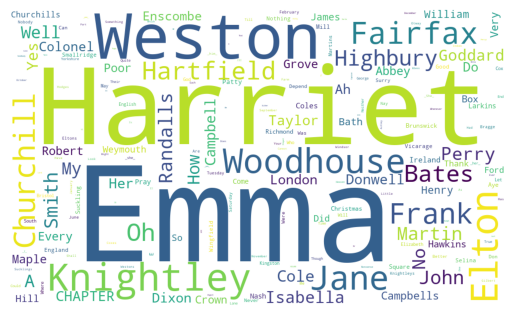

In [22]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

In [23]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.6.0'

In [24]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [25]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [26]:
from konlpy.corpus import kobill
kobill.fileids()

['1809896.txt',
 '1809897.txt',
 '1809895.txt',
 '1809894.txt',
 '1809890.txt',
 '1809891.txt',
 '1809893.txt',
 '1809892.txt',
 '1809899.txt',
 '1809898.txt']

In [27]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [28]:
from konlpy.tag import *
import os

# os.environ['JAVA_HOME'] = r'/Library/Java/JavaVirtualMachines/jdk1.8.0_291.jdk'
# print('JAVA_HOME' in os.environ)


hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
# mecab = Mecab()
okt = Okt()


In [29]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [30]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [31]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [32]:
okt.tagset


{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

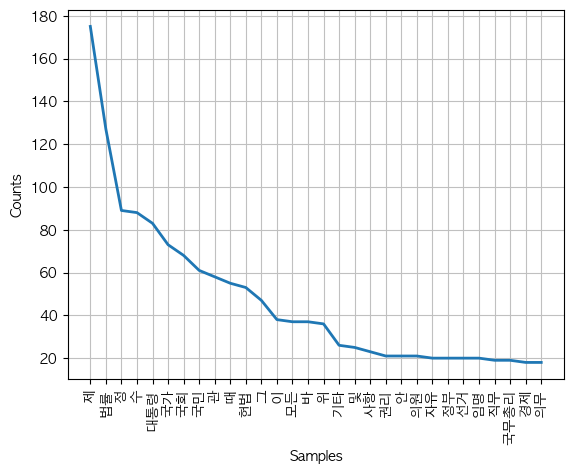

In [33]:
from nltk import Text
from matplotlib import font_manager,rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# font_path = r"/Users/choeyeongseo/Library/Fonts/NanumGothic.ttf"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font)

kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

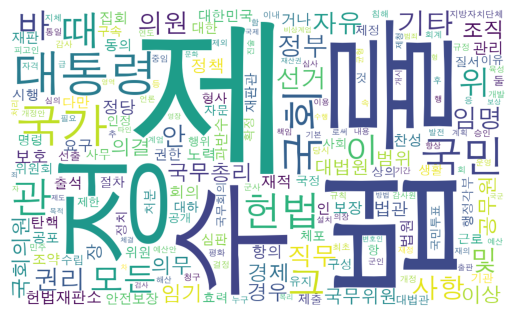

In [35]:
from wordcloud import WordCloud

font = "AppleGothic"
wc = WordCloud(width = 1000, height = 600,   \
           background_color="white", font_path=font)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()
